<a href="https://colab.research.google.com/github/CristianS1988/GooSL/blob/main/TextLaboratorio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema 3:
Descargue el Dataset (de click aqu´ı para descargar) el cual contiene aproximadamente 800,000
tweets de diversos temas.
Usando CoLab y expresiones regulares. Determine los 3 usuarios m ?as populares dentro del
dataset. Luego arme un corpus el cual contenga los siguientes elementos por cada usuario seleccionado:

# Leer el archivo CSV que contiene los tweets.

In [4]:
import pandas as pd

df = pd.read_csv('tw_source.csv', encoding='ISO-8859-1')



In [7]:
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
print(df.head())


   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....           

# Identificar menciones a usuarios y determinar los 3 usuarios más mencionados.

In [9]:
import re
from collections import Counter

# Identificar menciones a usuarios
mentions = df.iloc[:, 5].str.findall(r'@\w+').explode().dropna()

# Determinar los 3 usuarios más mencionados
top_users = mentions.value_counts().head(3).index.tolist()


# Verificar la columna de tweets:

In [10]:
sample_tweets = df.iloc[:, 5].head(20)
print(sample_tweets)


0     is upset that he can't update his Facebook by ...
1     @Kenichan I dived many times for the ball. Man...
2       my whole body feels itchy and like its on fire 
3     @nationwideclass no, it's not behaving at all....
4                         @Kwesidei not the whole crew 
5                                           Need a hug 
6     @LOLTrish hey  long time no see! Yes.. Rains a...
7                  @Tatiana_K nope they didn't have it 
8                             @twittera que me muera ? 
9           spring break in plain city... it's snowing 
10                           I just re-pierced my ears 
11    @caregiving I couldn't bear to watch it.  And ...
12    @octolinz16 It it counts, idk why I did either...
13    @smarrison i would've been the first, but i di...
14    @iamjazzyfizzle I wish I got to watch it with ...
15    Hollis' death scene will hurt me severely to w...
16                                 about to file taxes 
17    @LettyA ahh ive always wanted to see rent 

# Verificar el conteo de menciones

In [11]:
mention_counts = mentions.value_counts().head(20)
print(mention_counts)


@mileycyrus         4500
@tommcfly           3887
@ddlovato           3467
@DavidArchie        1299
@Jonasbrothers      1287
@jordanknight       1130
@DonnieWahlberg     1104
@mitchelmusso       1077
@JonathanRKnight    1074
@taylorswift13      1011
@jonasbrothers       986
@selenagomez         801
@dougiemcfly         794
@peterfacinelli      637
@aplusk              624
@joeymcintyre        578
@Dannymcfly          546
@gfalcone601         540
@shaundiviney        511
@YoungQ              507
Name: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D, dtype: int64


# Creación del corpus

In [12]:
corpus = {}
for user in top_users:
    user_tweets = df[df.iloc[:, 5].str.contains(user, na=False)]
    corpus[user] = {
        'Content': user_tweets.iloc[:, 5].tolist(),
        'Metadata': {
            'ID': user_tweets.iloc[:, 1].tolist(),
            'Timestamp': user_tweets.iloc[:, 2].tolist(),
            'Length': user_tweets.iloc[:, 5].str.len().tolist()
        }
    }


# Preprocesamiento de texto: remover stopwords, realizar stemming y lemmatización

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# preprocesamiento

In [14]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

context = {}
for user, data in corpus.items():
    words = []
    for tweet in data['Content']:
        tweet_words = tweet.split()
        for i, word in enumerate(tweet_words):
            if user in word:
                # Tomar 5 palabras antes y después de la mención
                context_words = tweet_words[max(i-5, 0):i] + tweet_words[i+1:min(i+6, len(tweet_words))]
                words.extend(context_words)
    # Remover stopwords, hacer stemming y lemmatización
    words = [lemmatizer.lemmatize(ps.stem(word)) for word in words if word.lower() not in stop_words]
    context[user] = words


# Mostrar un wordcloud con las 10 palabras más frecuentes para cada usuario

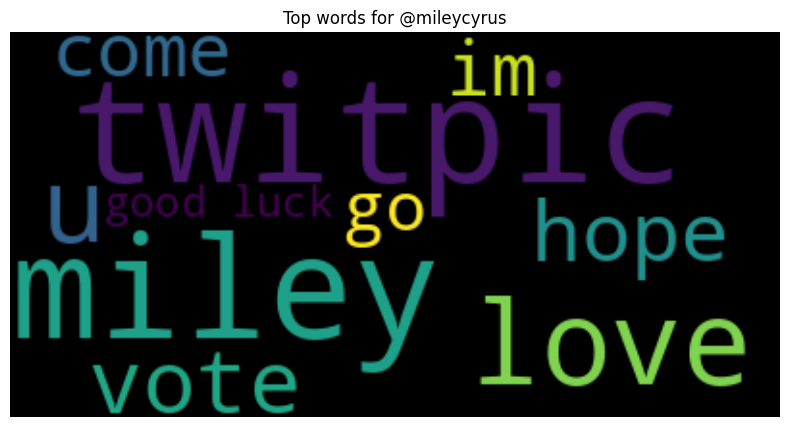

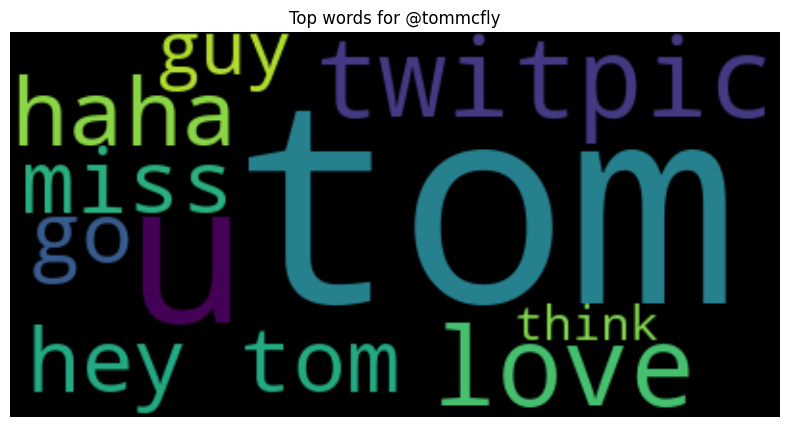

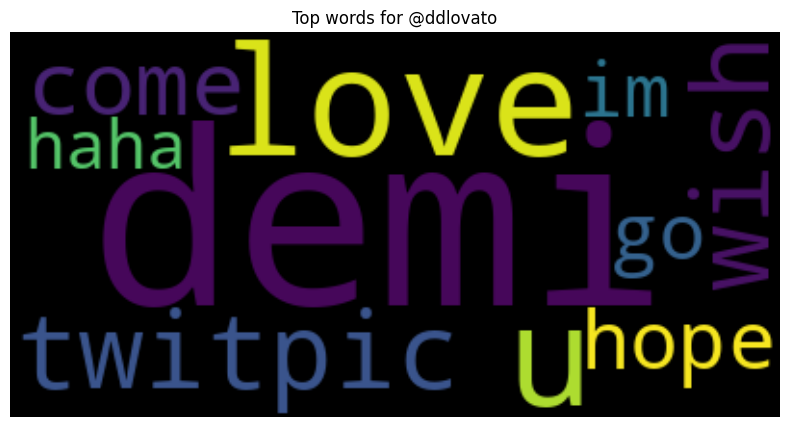

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mostrar wordcloud
for user, words in context.items():
    wordcloud = WordCloud(max_words=10).generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top words for {user}')
    plt.show()
